## Setup the environment for pymc3

In [ ]:
%cd pymc3
!pip install -r requirements.txt

/content/pymc3
  Using cached arviz-0.17.1-py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.1
    Uninstalling arviz-0.12.1:
      Successfully uninstalled arviz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.10.4 requires pytensor<2.19,>=2.18.1, but you have pytensor 2.19.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, bu

In [ ]:
!pip install scipy==1.7.3

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.17.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.1 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.1 which is incompatible.
pymc 5.10.4 requires pytensor<2.19,>=2.18.1, but you have pytensor 2.19.0 which is incompatible.


##STEP 1 : Load train.csv and analyse the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the train.csv from github url
url = "https://raw.githubusercontent.com/NeerajSura/PML/main/Project2/train.csv"
data = pd.read_csv(url)

In [ ]:
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [ ]:
data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


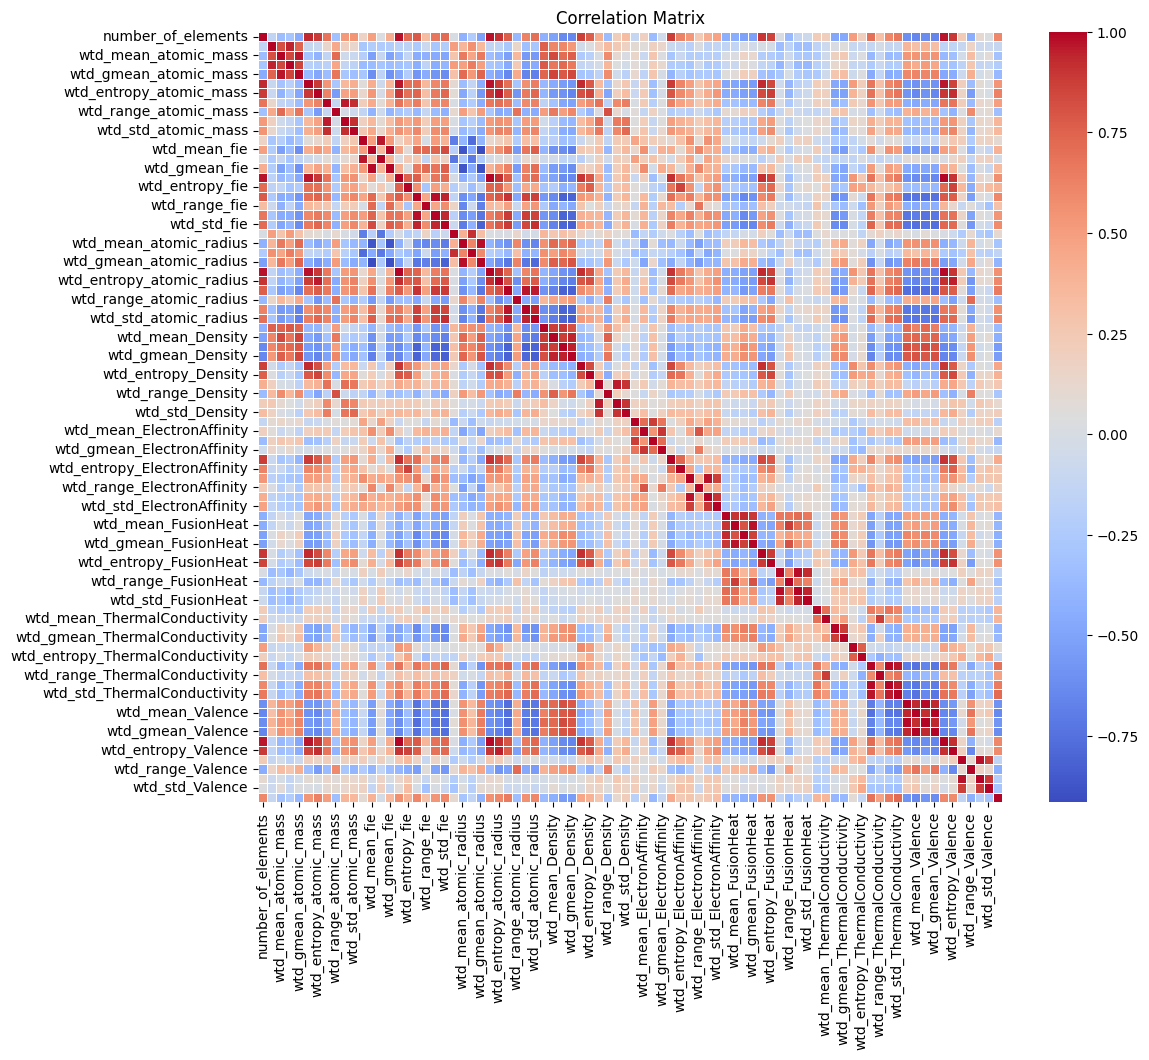

In [ ]:
# Correlation Matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate statistics
mean_corr = corr_matrix.mean().mean()
median_corr = corr_matrix.median().median()
max_corr = corr_matrix.max().max()
min_corr = corr_matrix.min().min()

# Print statistics
print("Mean correlation:", mean_corr)
print("Median correlation:", median_corr)
print("Maximum correlation:", max_corr)
print("Minimum correlation:", min_corr)

Mean correlation: 0.08304628314271824
Median correlation: 0.08946050679954554
Maximum correlation: 1.0
Minimum correlation: -0.914255374357598


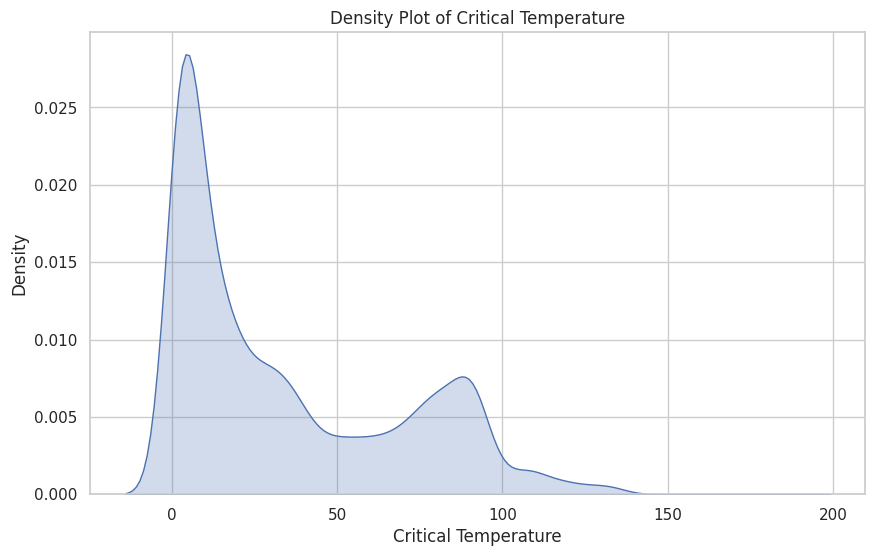

In [ ]:
# Assuming 'data' is your DataFrame containing the 'critical_temp' feature
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot density graph
sns.kdeplot(data['critical_temp'], fill=True)
plt.title('Density Plot of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Density')
plt.show()

In [ ]:
# Data Preprocessing and cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop(columns=['critical_temp'])
y = data['critical_temp']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64


## Step 2 : Multiple Regression

In [ ]:
!pip install --upgrade arviz


  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.10.4 requires pytensor<2.19,>=2.18.1, but you have pytensor 2.19.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.26.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.12.0 which is incompatible.


In [ ]:
import os

# Set MKL_THREADING_LAYER environment variable
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Proceed with other imports or code
import pymc3 as pm



# Define the model
with pm.Model() as regression_model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Linear combination
    mu = alpha + pm.math.dot(beta, X_train.T)

    # Likelihood
    p = pm.Normal('p', mu=mu, sigma=sigma, observed=y_train)

    # Sampling
    trace_regression = pm.sample(10, tune=10)

# Plotting the trace
pm.traceplot(trace_regression)

# Inference
pm.summary(trace_regression)

# Predictions
with regression_model:
    ppc = pm.sample_posterior_predictive(trace_regression, samples=500)

# Mean Squared Error
mse = ((ppc['p'].mean(axis=0) - y_test) ** 2).mean()
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


AttributeError: module 'arviz' has no attribute 'from_pymc3'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X = data.drop(columns=['critical_temp'])
y = data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_degree = 2

# Creating polynomial features
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions
y_pred = model.predict(X_test_poly)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 449.09331298511376


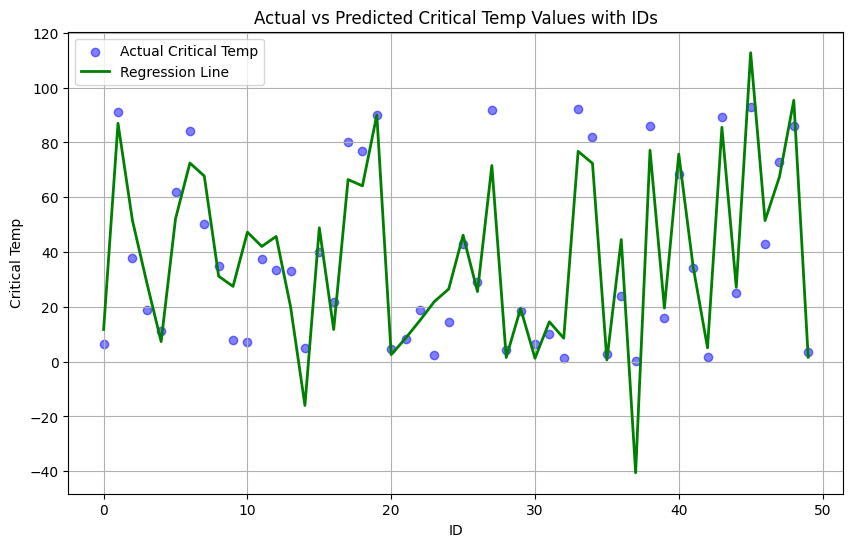

In [ ]:
# Plotting actual vs predicted values with IDs
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test[:50])), y_test[:50], color='blue', alpha=0.5, label='Actual Critical Temp')
#plt.scatter(range(len(y_pred[:50])), y_pred[:50], color='red', alpha=0.5, label='Predicted Critical Temp')
plt.plot(range(len(y_pred[:50])), y_pred[:50], color='green', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Critical Temp Values with IDs')
plt.xlabel('ID')
plt.ylabel('Critical Temp')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model

LinearRegression()

In [ ]:
#Generate positive and negative pairs
import random
import numpy as np

def positive_sampling(n_samples):
    print(f"Sampling {n_samples} Positive pairs")
    positive_samples=[]
    count=0
    for i in range(n_samples):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,19999)
        source=(list(train_sources))[source_random_index]
        chosen_source_sinks=train_dict[source] # fetch neighbors of selected source from train_dict
        try:
            sink=random.choice(list(chosen_source_sinks)) # chose any random neighbor
            positive_samples.append((source,sink)) # append to the list
        except:
            pass
    print('Length of positive samples list is :', len(positive_samples))
    return positive_samples


def negative_sampling(n_samples):
    print(f"Sampling {n_samples} Negative pairs")
    negative_samples=[]
    count = 0
    for i in range(n_samples):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,19999)
        source=(list(train_sources))[source_random_index]
        chosen_source_sinks=train_dict[source] # fetch neighbors of selected source from train_dict
        sink=random.choice(list(train_sinks)) # Choose any random neighbor node from any source
        if sink not in chosen_source_sinks: # If chosen neighbor is not in the neighbors of chosen source then we have a negative pair
            negative_samples.append((source, sink))
    print('Length of negative samples list is :', len(negative_samples))
    return negative_samples

num_samples = 20000
positive_samples=positive_sampling(num_samples)
np.save('positive_samples.npy',np.array(positive_samples)) # Save as np array for future reference

negative_samples=negative_sampling(num_samples)
np.save('negative_samples.npy',np.array(negative_samples)) # Save as np array for future reference


Sampling 20000 Positive pairs
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Length of positive samples list is : 19552
Sampling 20000 Negative pairs
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Length of negative samples list is : 19994


In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'\xef\xbb\xbfId,From,To\r1,3360982,4457271\r2,4761876,4698439\r3,4198430,3615486\r4,2945770,747948\r5,3950088,3360335\r6,2483976,1928881\r7,2785328,2672575\r8,385505,2877637\r9,4800097,1627742\r10,1399778,3338838\r11,178544,933485\r12,3116667,3394409\r13,4822324,3798666\r14,1014631,34363\r15,3637130,4624715\r16,572186,3573892\r17,4367817,848637\r18,2740302,4432643\r19,697676,774739\r20,233754,4372301\r21,2356466,2928383\r22,4511229,1707831\r23,1334864,4734827\r24,4823249,1941668\r25,2495939,3611146\r26,4539933,3701998\r27,2267515,299146\r28,414044,485185\r29,1770141,3706320\r30,4825426,2222470\r31,3571629,1964039\r32,2607822,4362893\r33,1606185,3693868\r34,2245172,4670041\r35,1668501,618303\r36,4801585,1889842\r37,4461666,3254522\r38,622210,4323012\r39,2988815,1276204\r40,3364505,3274350\r41,2842255,2202632\r42,121165,442888\r43,1902150,1982099\r44,2504780,4425830\r45,3515936,2226043\r46,1341663,194531\r47,2374063,1540939\r48,2695970,324371\r49,1274819,817807\r50,4468501,

In [ ]:
import pandas as pd
import numpy as np

positive_samples=np.load("10K_positive_samples.npy").tolist()
negative_samples=np.load("10K_negative_samples.npy").tolist()

def get_test_samples():
    test_data = pd.read_csv('test.csv')
    columns_to_convert = ['From', 'To']
    test_samples = test_data[columns_to_convert].values
    return test_samples.tolist()
test_samples = get_test_samples()

## STEP 3 : Feature Engineering

####1.Undirected Graph Features

In [ ]:
import networkx as nx
import csv
import numpy as np

def extract_features_positive_samples():
    features = []
    count = 0
    print("Generating positive samples features......")
    for sample in positive_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            feature.append(1)  # label=1

        except Exception as e:
            print("one error at: "+str(count))
            print(e)
            pass
        features.append(feature)
    print("positive samples features: "+str(len(features)))
    return features


def extract_features_negative_samples():
    features = []
    count = 0
    print("Generating negative samples features......")
    for sample in negative_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            feature.append(0)  # label=0
        except Exception as e:
            print("one error at: "+str(count))
            print(e)
            pass
        features.append(feature)

    print("negative samples features: "+str(len(features)))
    return features

def extract_features_test_samples():
    features = []
    count = 0
    print("Generating test samples features......")
    for sample in test_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)
        except Exception as e:
            print("one error at: "+str(len(count)))
            print(e)
            pass
        features.append(feature)

    return features

# add features and label, combine
def generate_traning_data_from_UG():
    positive_features_ug = extract_features_positive_samples()
    negative_features_ug = extract_features_negative_samples()
    features_ug = positive_features_ug + negative_features_ug
    # random.shuffle(features)
    return features_ug


traning_data_ug = generate_traning_data_from_UG()

def write_train_to_csv(traning_data):
    with open("train_ug_10k_samples.csv","w",newline="") as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow(["RA","JC","AA","PA","Label"])
        writer.writerows(traning_data)

write_train_to_csv(traning_data_ug)

def write_test_to_csv(test_data):
    with open("test_ug_10k_samples.csv","w",newline="") as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow(["RA","JC","AA","PA"])
        writer.writerows(test_data)

test_data=extract_features_test_samples()
write_test_to_csv(test_data)



Generating positive samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
positive samples features: 9783
Generating negative samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
negative samples features: 9995
Generating test samples features......
0
1000


####2.Sparse Adjacency Matrix Features

In [ ]:
# Construct Adjacency Matrix
import requests
from scipy.sparse import csr_matrix

print("Generating matrix......")

# Fetching CSV data from GitHub
url = 'https://github.com/NeerajSura/PML/raw/main/LinkPrediction/train.csv'
response = requests.get(url)

row = []
col = []
data = []

# Parsing CSV data
for line in response.text.split('\n'):
    if line.strip():  # Check if the line is not empty
        neighbour_list = [int(i) for i in line.split(',') if i.strip()]  # Remove empty values
        for i in range(1, len(neighbour_list)):
            row.append(neighbour_list[0])
            col.append(neighbour_list[i])
            data.append(1)

# Constructing CSR matrices
source_sink_matrix = csr_matrix((data, (row, col)), shape=(4867136, 4867136))
sink_source_matrix = csr_matrix((data, (col, row)), shape=(4867136, 4867136))

Generating matrix......


In [ ]:
from math import sqrt

def cos_sim(X,Y):
    try:
        return (np.dot(X,Y.T)/(sqrt(X.nnz)*sqrt(Y.nnz))).toarray()[0][0]
    except:
        return 0

def pre_pre_cos(key1,key2):
    return cos_sim(sink_source_matrix[key1],sink_source_matrix[key2])
def suc_pre_cos(key1,key2):
    return cos_sim(source_sink_matrix[key1],sink_source_matrix[key2])


In [ ]:
def extract_features_positive_samples():
    features = []
    count = 0
    print("Generating positive samples features......")
    for sample in positive_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.append(1)  # label=1

        except Exception as e:
            print(e)
            pass
        features.append(feature)
    print("positive samples features: " + str(len(features)))
    return features

def extract_features_negative_samples():
    features = []
    count = 0
    print("Generating negative samples features......")
    for sample in negative_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.append(0)  # label=0
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("negative samples features: " + str(len(features)))
    return features

def extract_features_test_samples():
    features = []
    count = 0
    print("Generating test samples features......")
    for sample in test_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("test samples features: " + str(len(features)))
    return features


def generate_traning_data_from_CSR():
    positive_features_csr = extract_features_positive_samples()
    negative_features_csr = extract_features_negative_samples()
    features_csr = positive_features_csr + negative_features_csr
    # random.shuffle(features)
    return features_csr

traning_data = generate_traning_data_from_CSR()

def write_train_to_csv(traning_data):
    with open("train_csr_10k_samples.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["PPS", "SPS","Label"])
        writer.writerows(traning_data)
write_train_to_csv(traning_data)

def write_test_to_csv(test_data):
    with open("test_csr_10k_samples.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["PPS", "SPS"])
        writer.writerows(test_data)
test_data = extract_features_test_samples()
write_test_to_csv(test_data)


Generating positive samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
positive samples features: 9783
Generating negative samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
negative samples features: 9995
Generating test samples features......
0
1000
test samples features: 2000


## STEP 4 : Modelling


####1. Logistic Regression

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Importing the dataset
dataset = pd.read_csv('train_merged_ug_csr__10k_samples.csv')
dataset

,RA,JC,AA,PA,PPS,SPS,Label
0,0.011652,0.028571,0.453945,1760,0.136931,0.073632,1
1,0.000000,0.000000,0.000000,78,0.000000,0.000000,1
2,2.022425,0.126685,22.050308,129355,0.351185,0.234849,1
3,0.001422,0.005747,0.152547,5400,0.042258,0.013762,1
4,0.000000,0.000000,0.000000,384,0.000000,0.000000,1
...,...,...,...,...,...,...,...
19773,0.000000,0.000000,0.000000,77,0.000000,0.000000,0
19774,0.000000,0.000000,0.000000,45,0.000000,0.000000,0
19775,0.000000,0.000000,0.000000,614,0.000000,0.000000,0
19776,0.000003,0.000912,0.077517,1096,0.075165,0.030486,0


In [ ]:
FEATURE_SIZE=6
feature_names = dataset.columns[:FEATURE_SIZE]
print(feature_names)

X = dataset.iloc[:,0:FEATURE_SIZE].values
y = dataset.iloc[:, FEATURE_SIZE].values


Index(['RA', 'JC', 'AA', 'PA', 'PPS', 'SPS'], dtype='object')


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape

(15822, 6)

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

Selected features: Index(['RA', 'JC', 'AA', 'PA', 'SPS'], dtype='object')
AUC Score: 0.8842476616224934


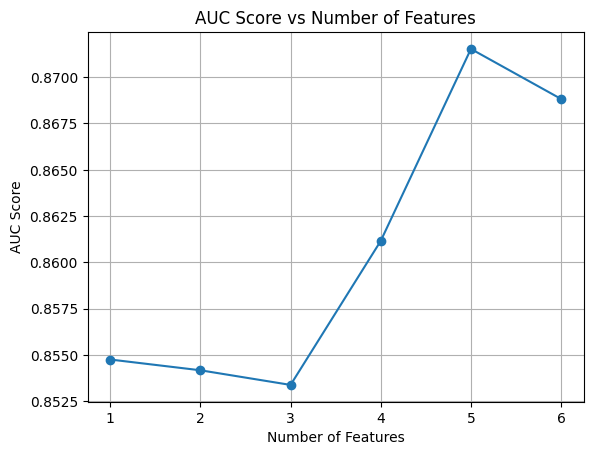

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
clf = LogisticRegression(max_iter=1000, C=1e4,penalty='l2')

# Initialize RFECV for feature selection
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='roc_auc')

# Fit RFECV
rfecv.fit(x_train, y_train)

# Print selected feature names
selected_features = feature_names[rfecv.support_]
print("Selected features:", selected_features)

# Transform datasets with selected features
x_train_selected = rfecv.transform(x_train)
x_test_selected = rfecv.transform(x_test)

# Train classifier with selected features
clf.fit(x_train_selected, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(x_test_selected)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Plot the AUC scores against the number of features
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Features')
plt.grid(True)
plt.show()

In [ ]:
selected_features.tolist()

['RA', 'JC', 'AA', 'PA', 'SPS']

In [ ]:
testdata = pd.read_csv('test_merged_ug_csr_10k_samples.csv')
testdata = testdata.drop(columns='PPS')
x_testing = testdata.iloc[:,0:len(selected_features.tolist())].values
sc = StandardScaler()
x_testing = sc.fit_transform(x_testing)
x_testing = sc.transform(x_testing)
predictions=clf.predict_proba(x_testing)

In [ ]:
import csv
with open("Predictions_10k_samples_5_features.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["Id","Predictions"])
    test_id=1
    for prediction in predictions:
        writer.writerow([test_id,prediction[1]])
        test_id+=1